# EDA

## Análisis exploratorio

En esta sección se organizara y preparará los datos, para identificar fallos en la recogida, diseño evaluar, datos ausentes, identificar casos atípicos.

Algunas preguntas para iniciar:

¿Hay sesgos en los datos?

¿Existen errores en la codificación de los datos?

¿Cómo se presentan los datos y cuál es la mejor forma de visualizarlos?

¿Exisisten datos atípicos(outliers)?¿Cuáles son? ¿Cómo tratarlos?

¿Hay datos faltantes(missing) y cómo se deberían tratar?

In [1]:
import pandas as pd
data_arg=pd.read_csv('../data/---datos limpios/df_propiedades.csv')

RECORDAMOS: El objetivo es crear un modelo de machine learning que prediga precios de propiedades en Argentina, solo el tipo de operación venta y en dolares. 

In [2]:
data_arg.sample(5)

,localidad,id,ad_type,start_date,end_date,created_on,lat,lon,país,provincia,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
106588,San Miguel de Tucumán,+3vFZMywKBNRyPDLtvRiag==,Propiedad,2020-09-11,2020-09-13,2020-09-11,-26.823076,-65.209210,Argentina,Tucumán,...,2.0,221.0,171.0,112000.0,USD,Mensual,Casa - San Miguel De Tucumán,Propiedad tipo horizontal en planta baja compu...,Casa,Venta
32689,San Bernardo,ZYu0mfyJZl3bFzk3/g1YIw==,Propiedad,2020-05-05,2020-05-27,2020-05-05,-36.687759,-56.679340,Argentina,Buenos Aires Costa Atlántica,...,1.0,165.0,171.0,45000000.0,USD,NaN,CASA EN VENTA SAN BERNARDO LO BLANCO 1D 1B est...,"Aprovecha tu subsidio, crédito hipotecario en ...",Casa,Venta
262079,Rosario,tfwmsMuemHPNVk88FPAX3g==,Propiedad,2021-01-19,2021-05-01,2021-01-19,-32.933553,-60.669315,Argentina,Santa Fe,...,1.0,43.0,37.0,69000.0,USD,Mensual,Departamento 1 dormitorio en construcción - Ro...,OPORTUNIDAD INVERSIÓN DE POZO<br><br>Amplio De...,Departamento,Venta
1401,San Isidro,rEmWxqphwuEMqfh1WPeCUw==,Propiedad,2021-01-03,2021-03-27,2021-01-03,-34.482847,-58.579183,Argentina,Bs.As. G.B.A. Zona Norte,...,2.0,240.0,171.0,450000.0,USD,NaN,Horqueta - Casa Venta USD 450.000,IMPECCABLE!!!! \r\nMuy buena casa con jardin o...,Casa,Venta
380034,Rosario,dTONJRNbz+fyitmVbKRsfQ==,Propiedad,2020-07-22,2021-01-06,2020-07-22,-32.944906,-60.639923,Argentina,Santa Fe,...,1.0,60.0,54.0,119000.0,USD,NaN,SE VENDE departamento de 2 dormitorios -SANTA ...,[RETASADO] Venta departamento de dos dormitori...,Departamento,Venta


In [3]:
data_arg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609185 entries, 0 to 609184
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   localidad        609185 non-null  object 
 1   id               609185 non-null  object 
 2   ad_type          609185 non-null  object 
 3   start_date       609185 non-null  object 
 4   end_date         609185 non-null  object 
 5   created_on       609185 non-null  object 
 6   lat              609185 non-null  float64
 7   lon              609185 non-null  float64
 8   país             609185 non-null  object 
 9   provincia        609185 non-null  object 
 10  rooms            609185 non-null  float64
 11  bedrooms         609185 non-null  float64
 12  bathrooms        609185 non-null  float64
 13  surface_total    609185 non-null  float64
 14  surface_covered  609185 non-null  float64
 15  price            609185 non-null  float64
 16  currency         609185 non-null  obje

¿Qué variables tenemos?

In [4]:
print(data_arg.columns)

Index(['localidad', 'id', 'ad_type', 'start_date', 'end_date', 'created_on',
       'lat', 'lon', 'país', 'provincia', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')


¿Estas variables influyen o impactan en el precio de las propiedades(variable dependiente)?

Los posibles features:


* localidad
* provincia
* lat y lon
* rooms
* bedrooms
* bathrooms
* surface_total
* surface_covered
* property_type                  

Descartadas:
* currency: es el tipo de moneda, que ya lo filtre anteriormente solo propiedades en USD(dolares)
* operation_type: porque solo me interesan las propiedad de venta y anteriormente se filtro por el tipo de operación venta.

¿Los datos estan en el tipo de dato correcto?

In [5]:
data_arg.dtypes

localidad           object
id                  object
ad_type             object
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
país                object
provincia           object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
price_period        object
title               object
description         object
property_type       object
operation_type      object
dtype: object

¿Esos posibles features tienen datos nulos?

In [6]:
data_arg.isnull().sum()

localidad               0
id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                     0
lon                     0
país                    0
provincia               0
rooms                   0
bedrooms                0
bathrooms               0
surface_total           0
surface_covered         0
price                   0
currency                0
price_period       387123
title                   1
description            24
property_type           0
operation_type          0
dtype: int64

Insight las posibles features:

* No contienen datos nulos
* La mayoria de datos estan en float, excepto: provincia, localidad, tipo de propiedad, que estan en object

In [7]:
data_arg[["lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]].describe(percentiles=[i/10 for i in list(range(1, 10))+[0.01 ,0.99]]). round(1). T


,count,mean,std,min,0.1%,9.9%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
lat,609185.0,-34.6,1.8,-54.8,-42.8,-37.1,-37.1,-34.8,-34.7,-34.6,-34.6,-34.6,-34.5,-34.4,-32.9,-22.0
lon,609185.0,-59.2,2.3,-72.9,-71.6,-60.9,-60.9,-58.9,-58.7,-58.6,-58.5,-58.4,-58.4,-58.4,-58.0,-53.7
rooms,609185.0,2.5,1.8,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0,5.0,40.0
bedrooms,609185.0,1.7,1.9,-16.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,900.0
bathrooms,609185.0,1.4,1.1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,20.0
surface_total,609185.0,267.6,1325.1,10.0,12.0,48.0,48.0,60.0,60.0,70.0,100.0,200.0,240.0,297.0,649.0,100000.0
surface_covered,609185.0,1201.1,768980.2,1.0,2.0,42.0,42.0,54.0,54.0,62.0,84.0,150.0,171.0,230.0,412.0,600000000.0


Insight:

* Lat y lon tienen valores razonables para propiedades en Argentina.

* rooms: el maximo 40 --> parece outlier

* bedrooms: el min es -16 es un error, el max 900 tambien parece un error

* bathrooms: maximo 20 puede ser posible, pero poco común. Revisar si es outlier

* superficie total: 

 la mediana es 267 m2

el max 100.000 m2 probablemente sea un error

* superficie cubierta: 

la media: 1201 es raro, porque es más grande que la mediana de superficie total

el maximo: 600.000.000. Es un error 

In [8]:
#eliminar los valore negativos de bedrooms
data_arg = data_arg[data_arg['bedrooms']>= 0]

## ¿Cómo estan distribuidas las variables?

## Análisis univariado

### Análisis target: price

¿Cómo esta distribuido el precio de las propiedades?

In [22]:
data_arg.price.describe().round(1)

count       609054.0
mean        223969.1
std         468066.7
min              1.0
25%          75000.0
50%         130000.0
75%         240000.0
max      111111111.0
Name: price, dtype: float64

Insight:

El precio promedio es 223.921, pero hay precios de propiedades que cuestan 0 y otras muchisimo más 111 millones, que son outiliers. Por lo que la desviación estándar es muy alta: 468.028

Se realiza un histograma y log-histograma para ver la distribución de precio. 

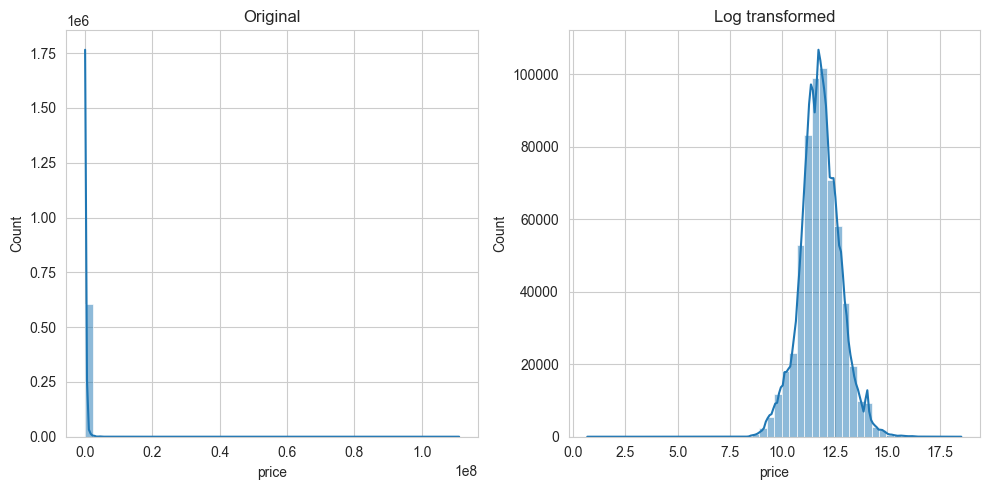

In [23]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))

# Histograma original
plt.subplot(1, 2, 1)
sns.histplot(data_arg['price'], bins=50, kde=True)
plt.title('Original')

# Histograma con log1p
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(data_arg['price']), bins=50, kde=True)
plt.title('Log transformed')

plt.tight_layout()

Insight distribución original:

* Hay un **sesgo positivo** porque hay una alta concentración de precios bajos, y valores extremadamente altos (outliers) que estiran la escala hacia la derecha.



¿Cómo tratar los outliers?

In [24]:
data_arg['price'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1)


count       609054.0
mean        223969.1
std         468066.7
min              1.0
1%           12500.0
10%          43000.0
20%          65000.0
30%          84500.0
40%         105000.0
50%         130000.0
60%         160000.0
70%         210000.0
80%         280000.0
90%         440000.0
99%        1500000.0
max      111111111.0
Name: price, dtype: float64

In [25]:
print(f"Cantidad de outliers por encima del P99: {(data_arg['price'] > data_arg['price'].quantile(0.99)).sum()}")


Cantidad de outliers por encima del P99: 5913


Insight: 
Hay un cambio abrupto de 1.500.000 a 111.0000.000 que explica la distribución altamente sesgada. Por ultimo, son 5913 propiedades por encima P99.

Para que esto no afecte los modelos, correlaciones y visualizaciones se decide, realizar la transformación logaritmica a price. 

In [26]:
data_arg[data_arg['price'] == 0].shape

(0, 23)

In [27]:
#se elimina las propiedades ==0 
data_arg = data_arg[data_arg['price'] > 0]


In [28]:
data_arg['price_log'] = np.log(data_arg['price'])


### Variables discretas: rooms,bedrooms, bathrooms

In [29]:
data_arg[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']].describe().round(1)


,rooms,bedrooms,bathrooms,surface_total,surface_covered
count,609054.0,609054.0,609054.0,609054.0,609054.0
mean,2.5,1.7,1.4,267.5,1201.3
std,1.8,1.9,1.1,1325.2,769062.9
min,0.0,0.0,0.0,10.0,1.0
25%,1.0,1.0,1.0,60.0,54.0
50%,2.0,1.0,1.0,100.0,84.0
75%,4.0,3.0,2.0,240.0,171.0
max,40.0,900.0,20.0,100000.0,600000000.0


Valores extremos:

*Rooms*
* Max -->40. Probablemente sea un outlier

*Bedrooms*
* Max -->900. Es un valor outlier

*Bathrooms*
* Max -->20. Es un valor inusual

*Surface_total*
* std: 1325.2 es muy alta con respecto al promedio que es 267.5. Lo que indica que hay propiedades extremadamente grandes en comparación con la media.

* Max:  100,000 m², lo que es una superficie extremadamente grande, y podría reflejar propiedades comerciales o grandes terrenos.

*Surface_covered*

* std: 769062.9 refleja una gran variabilidad con respecto a la media.

* Max: 600.000.000 es un valor extremadamente alto y probablemente sea un error en la carga de datos o propiedades expecionales(terrenos muy grandes)

In [30]:
data_arg.dtypes


localidad           object
id                  object
ad_type             object
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
país                object
provincia           object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
price_period        object
title               object
description         object
property_type       object
operation_type      object
price_log          float64
dtype: object

In [31]:
data_arg["bathrooms"] = data_arg["bathrooms"].astype("Int64")
data_arg["rooms"] = data_arg["rooms"].astype("Int64")
data_arg["bedrooms"] = data_arg["bedrooms"].astype("Int64")


#### Rooms

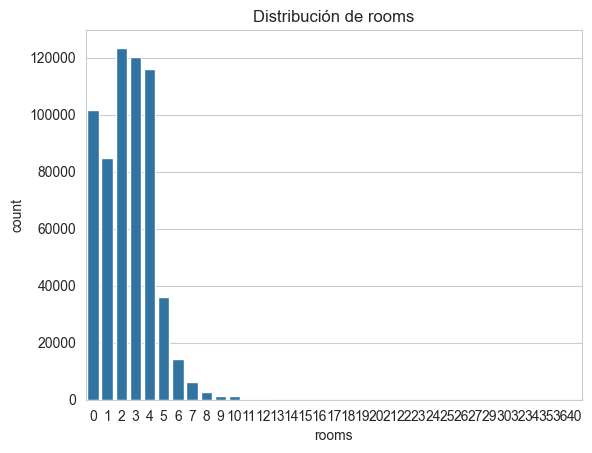

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot para valores enteros
sns.countplot(x=data_arg["rooms"])
plt.title("Distribución de rooms")
plt.show()

Insight:

Distribución sesgada a la izquierda(positiva), porque la mayoria de propiedades tiene entre 1 y 5 habitaciones. A partir de 6, la frecuencia cae.

Outliers a la derecha: como vimos en el discribe() y acá se confirma hay propiedades con hasta 40 habitaciones.

El número de propiedades con más de 6 habitaciones es muy bajo.

¿Cómo tratar los outliers?

In [33]:
data_arg['rooms'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1)


count    609054.0
mean          2.5
std           1.8
min           0.0
1%            0.0
10%           0.0
20%           1.0
30%           1.0
40%           2.0
50%           2.0
60%           3.0
70%           3.0
80%           4.0
90%           5.0
99%           7.0
max          40.0
Name: rooms, dtype: Float64

In [34]:
print(f"Cantidad de outliers por encima del P99: {(data_arg['rooms'] > data_arg['rooms'].quantile(0.99)).sum()}")


Cantidad de outliers por encima del P99: 6079


Insight:
* El 99% de las propiedades tienen ≤ 7 rooms y hay un cambio abrupto hacia 40 rooms.

* Hay 6.079 outliers por encima del percentil 99 (P99), lo que representa solo el 1% del total.

Con estos datos, se decide el metodo capping con P99, para tratar los outliers de rooms.

In [35]:
p99 = data_arg['rooms'].quantile(0.99)  # P99 = 7.0
data_arg['rooms_capped'] = data_arg['rooms'].apply(lambda x: p99 if x > p99 else x)


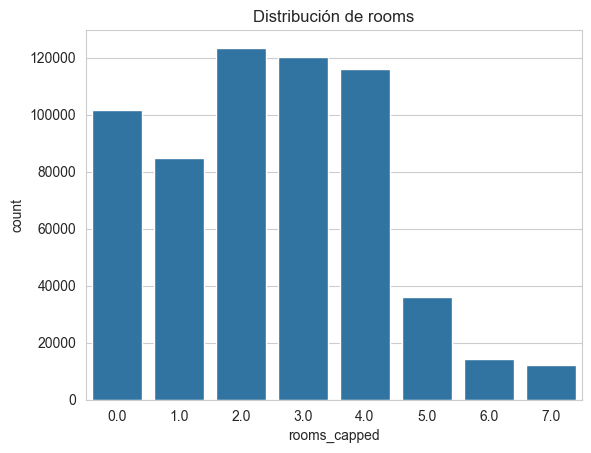

In [36]:
# Countplot para valores enteros
sns.countplot(x=data_arg["rooms_capped"])
plt.title("Distribución de rooms")
plt.show()

#### Bedrooms

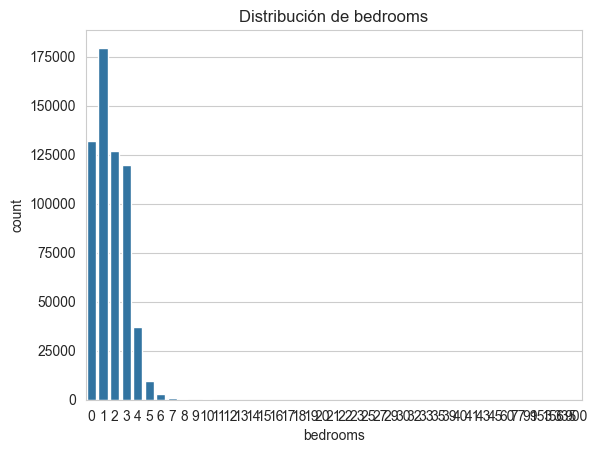

In [37]:
sns.countplot(x=data_arg["bedrooms"])
plt.title("Distribución de bedrooms")
plt.show()

Tratamiento outliers

In [38]:
print(data_arg['bedrooms'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1))

print(f"Cantidad de outliers por encima del P99: {(data_arg['bedrooms'] > data_arg['bedrooms'].quantile(0.99)).sum()}")


count    609054.0
mean          1.7
std           1.9
min           0.0
1%            0.0
10%           0.0
20%           0.0
30%           1.0
40%           1.0
50%           1.0
60%           2.0
70%           2.0
80%           3.0
90%           3.0
99%           5.0
max         900.0
Name: bedrooms, dtype: Float64
Cantidad de outliers por encima del P99: 4680


In [39]:
p99 = data_arg['bedrooms'].quantile(0.99)  # 5.0
data_arg['bedrooms_capped'] = data_arg['bedrooms'].apply(lambda x: p99 if x > p99 else x)


#### Bathrooms

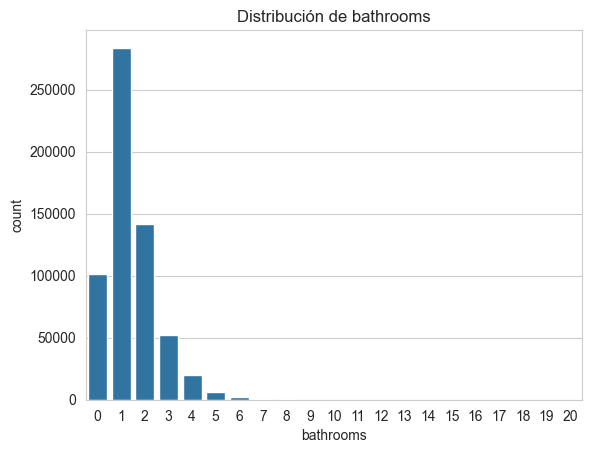

In [40]:
sns.countplot(x=data_arg["bathrooms"])
plt.title("Distribución de bathrooms")
plt.show()

Insight:

Distribución con sesgo positivo. Porque la mayoria de las propiedades tienen entre 1 y 2 baños. Pero encontramos en una 20 baños, lo cual es un outlier.

In [41]:
print(data_arg['bathrooms'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1))
print(f"Cantidad de outliers por encima del P99: {(data_arg['bathrooms'] > data_arg['bathrooms'].quantile(0.99)).sum()}")


count    609054.0
mean          1.4
std           1.1
min           0.0
1%            0.0
10%           0.0
20%           1.0
30%           1.0
40%           1.0
50%           1.0
60%           1.0
70%           2.0
80%           2.0
90%           3.0
99%           5.0
max          20.0
Name: bathrooms, dtype: Float64
Cantidad de outliers por encima del P99: 3322


In [42]:
p99 = data_arg['bathrooms'].quantile(0.99)  # 5.0
data_arg['bathrooms_capped'] = data_arg['bathrooms'].apply(lambda x: p99 if x > p99 else x)


### Variables continuas

#### Surface_covered

In [43]:
data_arg.surface_covered.describe().round(1)

count       609054.0
mean          1201.3
std         769062.9
min              1.0
25%             54.0
50%             84.0
75%            171.0
max      600000000.0
Name: surface_covered, dtype: float64

Insight: Surface_covered tiene una distribución muy sesgada por que el valor max 600.000.000 que puede ser un outlier o error de carga.


In [44]:
print(data_arg['surface_covered'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1))

print(f"Cantidad de outliers por encima del P99: {(data_arg['surface_covered'] > data_arg['surface_covered'].quantile(0.99)).sum()}")


count       609054.0
mean          1201.3
std         769062.9
min              1.0
1%              13.0
10%             42.0
20%             54.0
30%             54.0
40%             62.0
50%             84.0
60%            150.0
70%            171.0
80%            230.0
90%            412.0
99%            530.0
max      600000000.0
Name: surface_covered, dtype: float64
Cantidad de outliers por encima del P99: 6080


Insight:
* El percentil 99% indica que el 99% de las propiedades tienen una superficie cubierta menor o igual a 530 m².

* Tambien significa que solo el 1% de los datos está por encima de 530 m², que son 6080 propiedades. 


In [45]:
# Mostrar P95, P98, P99, P99.5 y P99.9 de surface_covered redondeado
print(data_arg['surface_covered'].describe(percentiles=[0.95, 0.98, 0.99, 0.995, 0.999]).round(1))


count       609054.0
mean          1201.3
std         769062.9
min              1.0
50%             84.0
95%            412.0
98%            412.0
99%            530.0
99.5%          848.0
99.9%         3000.0
max      600000000.0
Name: surface_covered, dtype: float64


¿Cómo tratar los outliers? 

In [46]:
# Definí los percentiles que queremos calcular
percentiles = [0.98, 0.99, 0.995, 0.999]

# Creamos una función que calcula los percentiles deseados
def calculate_percentiles(group):
    result = {}
    for p in percentiles:
        result[f'P{int(p*1000)/10}'] = np.percentile(group['surface_covered'], p*100)
    return pd.Series(result)

# Aplicamos la función por tipo de propiedad
percentile_summary = (
    data_arg.groupby('property_type')
      .apply(calculate_percentiles)
      .reset_index()
      .sort_values(by='P99.9', ascending=False)
)

percentile_summary

C:\Users\NB USER\AppData\Local\Temp\ipykernel_5700\3227131367.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_percentiles)


,property_type,P98.0,P99.0,P99.5,P99.9
4,Depósito,4700.00,9032.4,38418.970,86664.000
6,Lote,775.00,1200.0,2300.000,17000.000
1,Casa de campo,561.00,1292.0,2221.200,10170.880
5,Local comercial,1000.00,1350.0,1800.000,4510.902
7,Oficina,695.64,1030.0,1330.000,2501.014
0,Casa,439.00,516.0,632.790,1000.000
3,Departamento,177.00,230.0,293.000,406.000
8,PH,185.00,228.0,270.000,400.000
2,Cochera,18.00,25.0,37.075,209.920


Tratamiento outliers

Eleji usar el capping por tipo de propiedad(property_type), ya que efectiviamente la superficie cubeirta varia entre departamento, casa de campo, deposito, etc. 

In [47]:
# Crear copia para trabajar sin modificar la original
data_arg['surface_covered_capped'] = data_arg['surface_covered']

# Agrupar por tipo de propiedad y aplicar capping personalizado
for prop_type, group in data_arg.groupby('property_type'):
    lower = group['surface_covered'].quantile(0.01)
    upper = group['surface_covered'].quantile(0.99)
    
    # Aplicar clip solo a los índices correspondientes a este grupo
    idx = group.index
    data_arg.loc[idx, 'surface_covered_capped'] = data_arg.loc[idx, 'surface_covered'].clip(lower=lower, upper=upper)


Validación

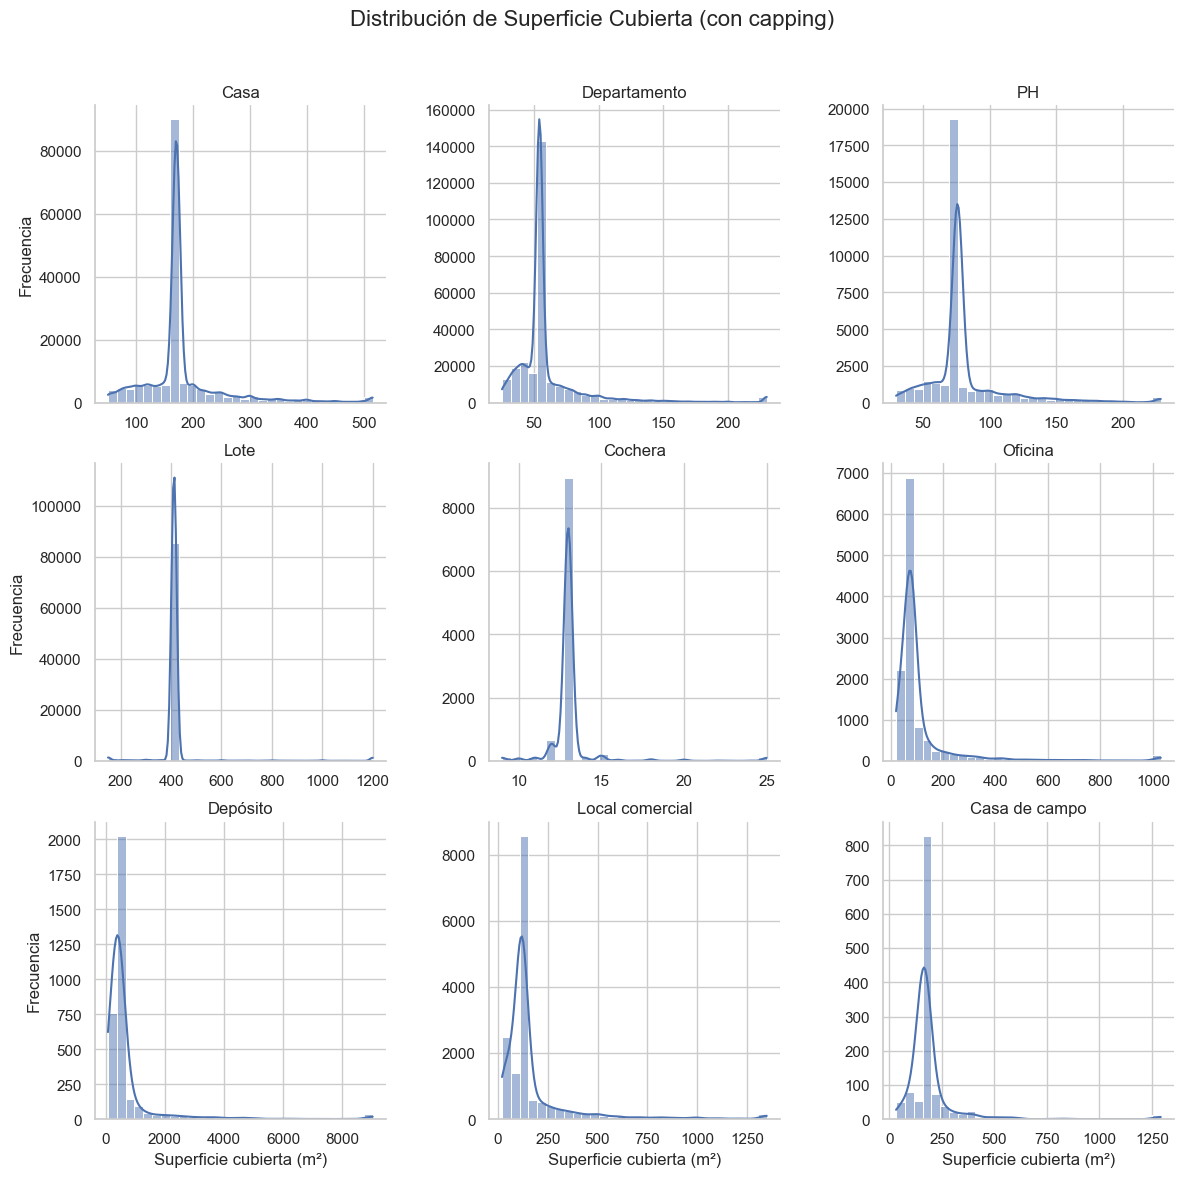

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo general
sns.set(style="whitegrid")

# Crear el FacetGrid por tipo de propiedad
g = sns.FacetGrid(data_arg, col="property_type", col_wrap=3, height=4, sharex=False, sharey=False)

# Graficar histogramas con KDE
g.map(sns.histplot, "surface_covered_capped", bins=30, kde=True, color="#4c72b0")

# Etiquetas y formato
g.set_titles("{col_name}")
g.set_axis_labels("Superficie cubierta (m²)", "Frecuencia")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribución de Superficie Cubierta (con capping)", fontsize=16)

# Mostrar
plt.show()

Insight:Sesgo positivo, incluso después de aplicar capping. 
Lo cual es esperable y aceptable en el contexto inmobiliario. Por qué:

* La superficie cubierta en propiedades reales no se distribuye normalmente. Siempre habrá más propiedades con superficie chica (como departamentos) y menos propiedades grandes (como depósitos o casas de campo), pero esas grandes siguen existiendo y son relevantes.

In [49]:
print(data_arg.groupby('property_type')['surface_covered_capped'].describe(percentiles=[0.95, 0.98, 0.99, 0.995, 0.999]).round(1))


                    count   mean     std    min    50%     95%     98%  \
property_type                                                            
Casa             165243.0  181.6    73.6   51.0  171.0   334.0   439.0   
Casa de campo      1221.0  190.8   141.1   32.0  165.0   380.0   561.0   
Cochera           10586.0   13.1     1.6    9.0   13.0    14.0    18.0   
Departamento     275420.0   60.8    30.9   25.0   54.0   120.0   177.0   
Depósito           3314.0  713.4  1180.9   82.1  430.0  2500.0  4700.0   
Local comercial   15955.0  176.5   209.1   20.0  120.0   581.0  1000.0   
Lote              91071.0  422.2   103.7  150.0  412.0   412.0   775.0   
Oficina           11975.0  115.1   146.2   21.0   77.0   350.0   695.6   
PH                34269.0   81.4    30.6   30.0   76.0   145.0   185.0   

                    99%   99.5%   99.9%     max  
property_type                                    
Casa              516.0   516.0   516.0   516.0  
Casa de campo    1205.6  1292.0  12

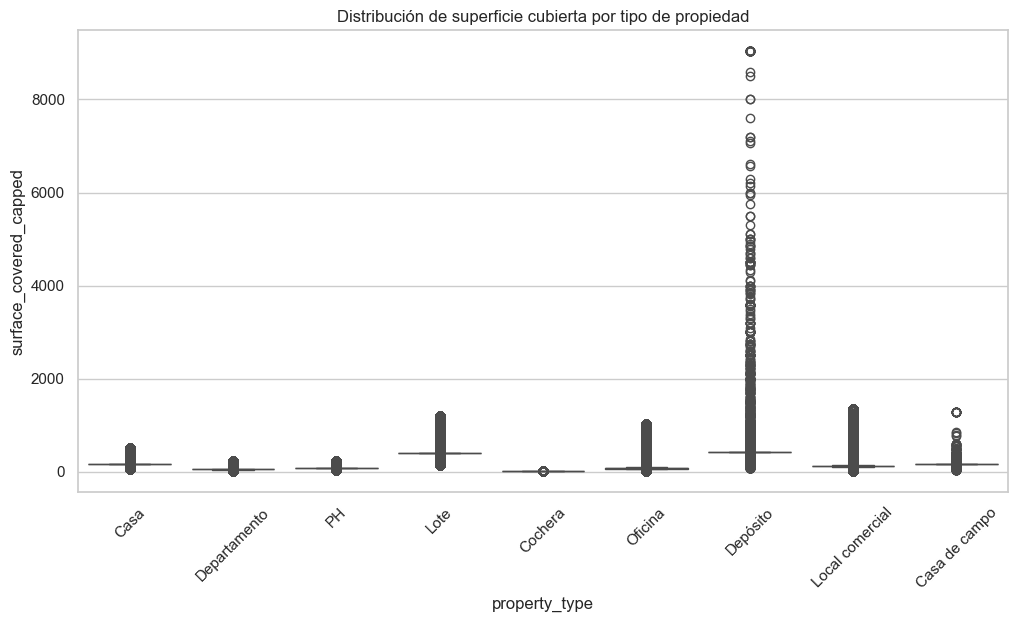

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_arg, x='property_type', y='surface_covered_capped')
plt.xticks(rotation=45)
plt.title("Distribución de superficie cubierta por tipo de propiedad")
plt.show()


Insight:

Se puede ver que aún despues del capping aún hay valores extremos en:
-deposito el máximo es 12.6 veces el tercer cuartil. Posible necesidad de revisar o recortar más.

ajustar el capping de deposito al percentil 98

In [51]:
# Capping específico para depósitos
cap_deposito = 4700

# Aplicar el nuevo capping
data_arg['surface_covered_capped'] = data_arg.apply(
    lambda row: min(row['surface_covered_capped'], cap_deposito) 
    if row['property_type'] == 'Depósito' else row['surface_covered_capped'],
    axis=1
)

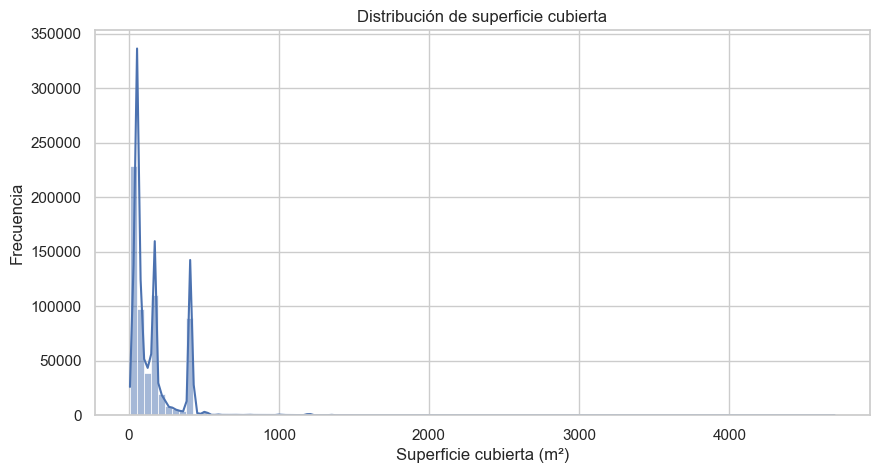

In [52]:
plt.figure(figsize=(10, 5))
sns.histplot(data_arg['surface_covered_capped'], kde=True, bins=100)
plt.title("Distribución de superficie cubierta")
plt.xlabel("Superficie cubierta (m²)")
plt.ylabel("Frecuencia")
plt.show()

Insight: Despues del capping sigue teniendo una distribución fuertemente sesgada. Por eso para el modelado y analisis de correlaciones , se aplica una transformación logaritmica. 

In [53]:
data_arg['surface_covered_log'] = np.log1p(data_arg['surface_covered_capped'])


¿Es probable que exactamente tantas propiedades tengan esas superficies justas? ¿Debe ser tratado como outliers?

#### Surface_total

In [54]:
data_arg['surface_total'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1)


count    609054.0
mean        267.5
std        1325.2
min          10.0
1%           13.0
10%          48.0
20%          60.0
30%          60.0
40%          70.0
50%         100.0
60%         200.0
70%         240.0
80%         297.0
90%         649.0
99%        1200.0
max      100000.0
Name: surface_total, dtype: float64

In [55]:
print(f"Cantidad de outliers por encima del P99: {(data_arg['surface_total'] > data_arg['surface_total'].quantile(0.99)).sum()}")


Cantidad de outliers por encima del P99: 6044


Insight:
* El percentil 99% indica que el 99% de las propiedades tienen una superficie cubierta menor o igual a 1200m2.

* Tambien significa que solo el 1% de los datos está por encima de 1200m2, que son 6044 propiedades.

Compración de los percentiles 98 y 99 de la superficie cubierta y superficie total

In [56]:
# Definimos los percentiles que queremos calcular
percentiles = [0.98, 0.99]

# Creamos una función que calcula los percentiles deseados para dos columnas
def calculate_percentiles(group):
    result = {}
    for p in percentiles:
        result[f'surface_covered_P{int(p*100)}'] = np.percentile(group['surface_covered'].dropna(), p*100)
        result[f'surface_total_P{int(p*100)}'] = np.percentile(group['surface_total'].dropna(), p*100)
    return pd.Series(result)

# Aplicamos la función por tipo de propiedad y ordenamos de menor a mayor por uno de los percentiles
percentile_summary = (
    data_arg.groupby('property_type')
      .apply(calculate_percentiles)
      .reset_index()
      .sort_values(by='surface_covered_P99', ascending=True)  # ordena por el percentil 99 de surface_covered
)

percentile_summary


C:\Users\NB USER\AppData\Local\Temp\ipykernel_5700\1073806581.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_percentiles)


,property_type,surface_covered_P98,surface_total_P98,surface_covered_P99,surface_total_P99
2,Cochera,18.00,21.00,25.0,26.00
8,PH,185.00,256.00,228.0,305.32
3,Departamento,177.00,201.00,230.0,257.00
0,Casa,439.00,920.00,516.0,1075.58
7,Oficina,695.64,728.00,1030.0,1105.70
6,Lote,775.00,2599.20,1200.0,6377.60
1,Casa de campo,561.00,10000.00,1292.0,14400.00
5,Local comercial,1000.00,979.84,1350.0,1212.00
4,Depósito,4700.00,3985.96,9032.4,5587.00


Insight:

Las superficies totales de LOCAL COMERCIAL Y DEPÓSITO son menores que la superficie cubierta , lo cual no es posible, porque la superficie total siempre es mayor. 
Ejemplo:

Un depósito tiene 9,032 m² cubiertos pero solo 5,587 m² de superficie total. Eso no tiene sentido físico.

Probablemente alguien completo mal los datos o omitio patios, terrazas, u otros espacios no cubiertos. 

In [57]:
# Crear copia para trabajar sin modificar la original
data_arg['surface_total_capped'] = data_arg['surface_total']

# Definir tipos para capping personalizado (excluidos aquí)
tipos_excluidos = ['Local comercial', 'Depósito']

# Aplicar capping general (percentil 1% y 99%) a los demás tipos
for prop_type, group in data_arg.groupby('property_type'):
    if prop_type not in tipos_excluidos:
        lower = group['surface_total'].quantile(0.01)
        upper = group['surface_total'].quantile(0.99)
        
        idx = group.index
        data_arg.loc[idx, 'surface_total_capped'] = data_arg.loc[idx, 'surface_total'].clip(lower=lower, upper=upper)


In [58]:
# Definí los percentiles que queremos calcular
percentiles = [0.98, 0.99, 0.995, 0.999]

# Creamos una función que calcula los percentiles deseados
def calculate_percentiles(group):
    result = {}
    for p in percentiles:
        result[f'P{int(p*1000)/10}'] = np.percentile(group['surface_total'], p*100)
    return pd.Series(result)

# Aplicamos la función por tipo de propiedad
percentile_summary = (
    data_arg.groupby('property_type')
      .apply(calculate_percentiles)
      .reset_index()
      .sort_values(by='P99.9', ascending=False)
)

percentile_summary

C:\Users\NB USER\AppData\Local\Temp\ipykernel_5700\863498680.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_percentiles)


,property_type,P98.0,P99.0,P99.5,P99.9
6,Lote,2599.20,6377.60,16405.05,59395.000
1,Casa de campo,10000.00,14400.00,17300.00,19780.000
4,Depósito,3985.96,5587.00,8614.80,10000.000
7,Oficina,728.00,1105.70,1368.34,2600.000
5,Local comercial,979.84,1212.00,1500.00,1900.000
0,Casa,920.00,1075.58,1200.00,1484.032
8,PH,256.00,305.32,361.66,503.000
3,Departamento,201.00,257.00,319.00,430.000
2,Cochera,21.00,26.00,38.00,73.830


In [59]:
# Capping personalizado para Local Comercial y Depósito
for prop_type, group in data_arg.groupby('property_type'):
    if prop_type == 'Local comercial':
        lower = group['surface_total'].quantile(0.01)
        upper = group['surface_total'].quantile(0.995)  # 99.5%
    elif prop_type == 'Depósito':
        lower = group['surface_total'].quantile(0.01)
        upper = group['surface_total'].quantile(0.999)  # 99.9%
    else:
        continue  # saltar otros tipos
    
    idx = group.index
    data_arg.loc[idx, 'surface_total_capped'] = data_arg.loc[idx, 'surface_total'].clip(lower=lower, upper=upper)


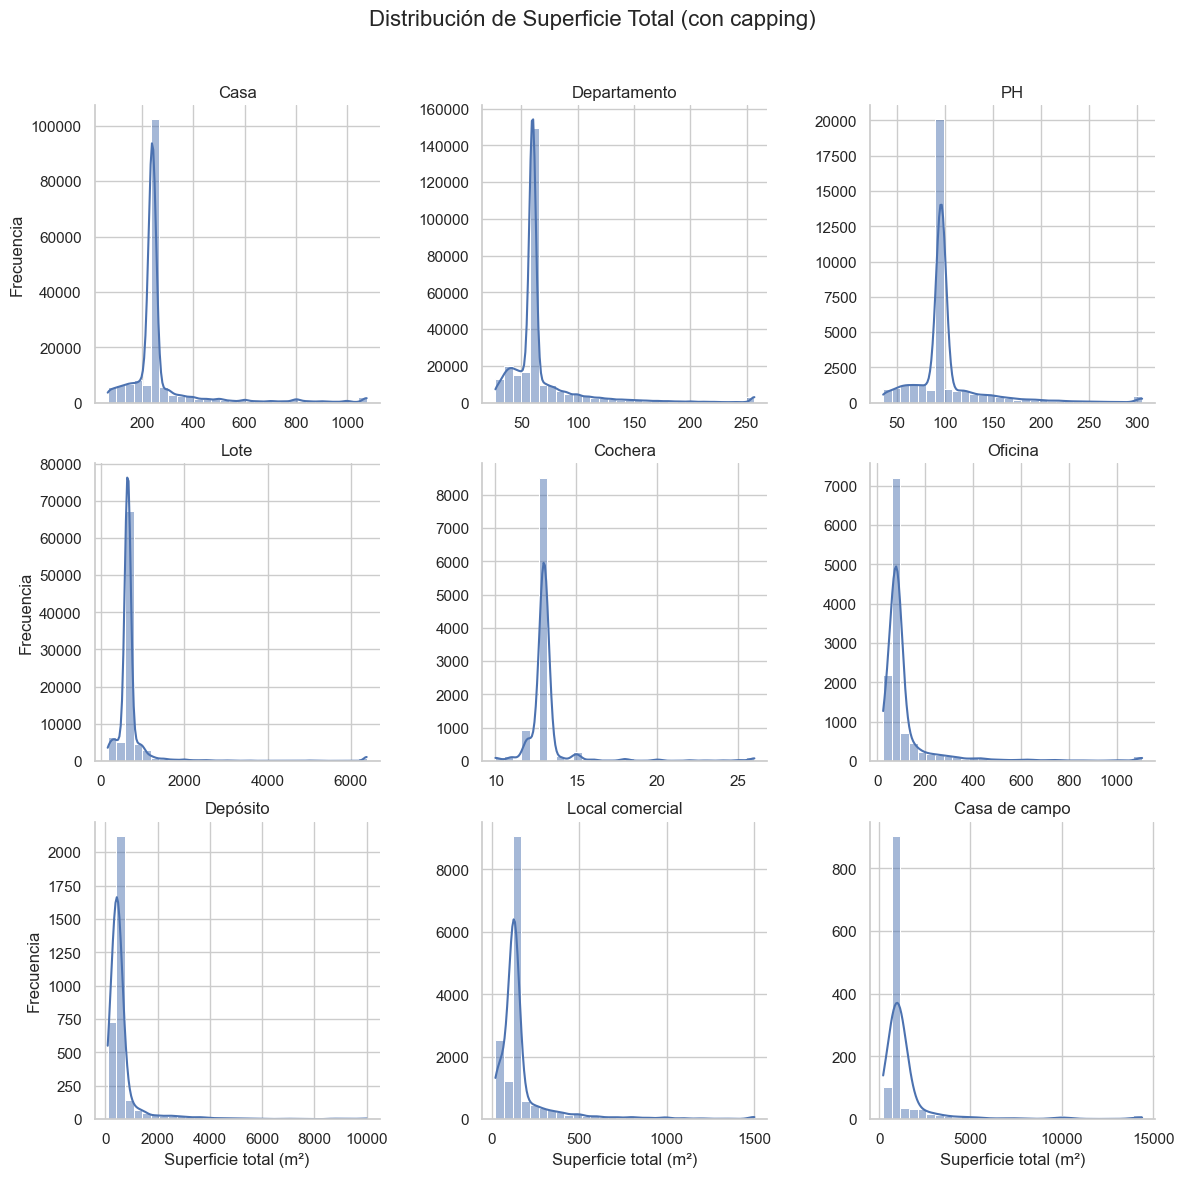

In [60]:
# Configurar estilo general
sns.set(style="whitegrid")

# Crear el FacetGrid por tipo de propiedad
g = sns.FacetGrid(data_arg, col="property_type", col_wrap=3, height=4, sharex=False, sharey=False)

# Graficar histogramas con KDE
g.map(sns.histplot, "surface_total_capped", bins=30, kde=True, color="#4c72b0")

# Etiquetas y formato
g.set_titles("{col_name}")
g.set_axis_labels("Superficie total (m²)", "Frecuencia")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribución de Superficie Total (con capping)", fontsize=16)

# Mostrar
plt.show()

In [61]:
data_arg['surface_total_log'] = np.log1p(data_arg['surface_total_capped'])


## Validación 

Antes de pasar al analisis bivariado y luego el modelado, quiero validar si las variables seleccionadas fueron limpiadas correctamente y estan listas para pasar a la siguiente etapa.

In [62]:
print(data_arg[['price', 'price_log']].skew())

print(data_arg[['price', 'price_log']].kurtosis())

price        44.720655
price_log     0.138120
dtype: float64
price        6525.376001
price_log       0.811595
dtype: float64


La asimetria
Price tiene una asimetria alta (44) pero aplicando el logaritmo se reduce drasticamenre a 0.13, que es una asimetría moderada y la distribución es más simetrica.

La curtosis:
Price tiene una curtosis muy alta, que implica que habia muchos valores extremos.
Price log la distribución se volvio más regular.

In [63]:
data_arg[['rooms_capped', 'bedrooms_capped', 'bathrooms_capped']].describe().round(1)

,rooms_capped,bedrooms_capped,bathrooms_capped
count,609054.0,609054.0,609054.0
mean,2.5,1.7,1.4
std,1.7,1.3,1.1
min,0.0,0.0,0.0
25%,1.0,1.0,1.0
50%,2.0,1.0,1.0
75%,4.0,3.0,2.0
max,7.0,5.0,5.0


Indagar el 0

In [64]:
print(data_arg[data_arg['rooms_capped'] == 0]['property_type'].value_counts())

print(data_arg[data_arg['bedrooms_capped'] == 0]['property_type'].value_counts())

print(data_arg[data_arg['bathrooms_capped'] == 0]['property_type'].value_counts())


property_type
Lote       91071
Cochera    10586
Name: count, dtype: int64
property_type
Lote               91071
Local comercial    14887
Cochera            10586
Departamento        7978
Depósito            3138
Casa                2768
Oficina             1261
PH                   145
Casa de campo         84
Name: count, dtype: int64
property_type
Lote       91071
Cochera    10586
Name: count, dtype: int64


Insight:

Lotes, cocheras, locales, depositos es logico que tengan 0 de dormitorios.

Departamientos, casas, PH, y casas de campo, oficinas con dormitorios 0 es inusual. Se va imputar por 1


In [65]:
mask = (data_arg['bedrooms_capped'] == 0) & (data_arg['property_type'].isin(['Departamento', 'Casa', 'PH', 'Oficina','Casa de campo']))
data_arg.loc[mask, 'bedrooms_capped'] = 1

Surface_covered_log

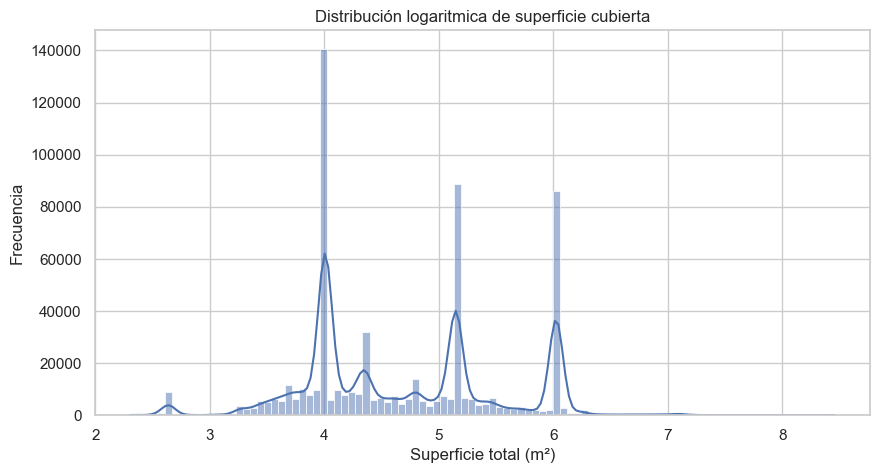

In [66]:
plt.figure(figsize=(10, 5))
sns.histplot(data_arg['surface_covered_log'], kde=True, bins=100)
plt.title("Distribución logaritmica de superficie cubierta")
plt.xlabel("Superficie total (m²)")
plt.ylabel("Frecuencia")
plt.show()

Surface_total_log

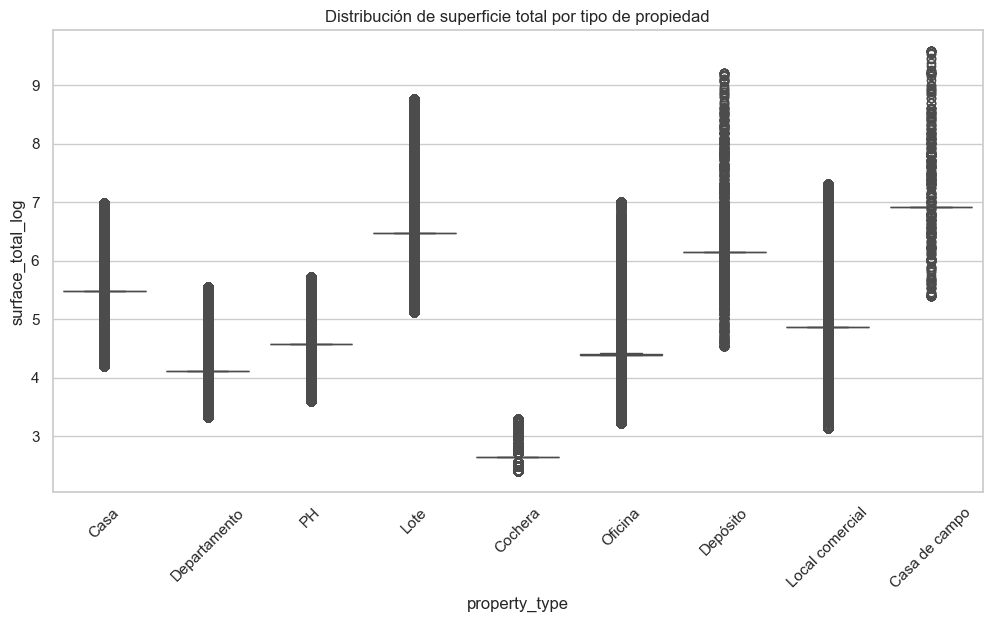

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_arg, x='property_type', y='surface_total_log')
plt.xticks(rotation=45)
plt.title("Distribución de superficie total por tipo de propiedad")
plt.show()


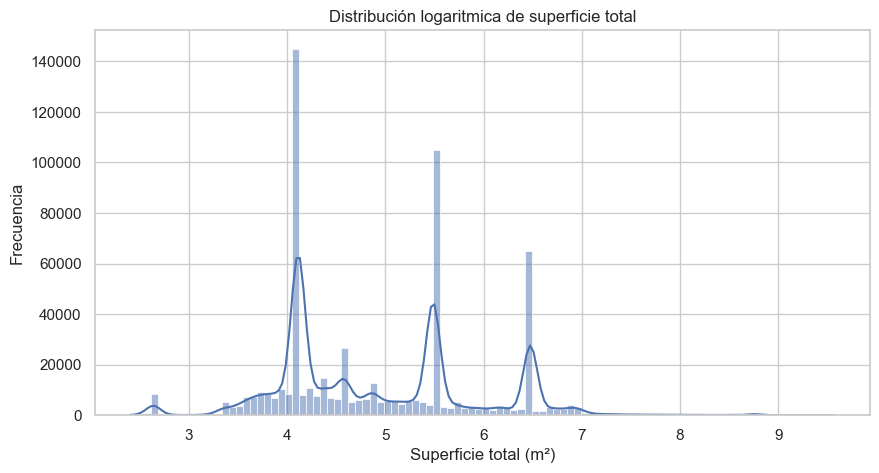

In [68]:
plt.figure(figsize=(10, 5))
sns.histplot(data_arg['surface_total_log'], kde=True, bins=100)
plt.title("Distribución logaritmica de superficie total")
plt.xlabel("Superficie total (m²)")
plt.ylabel("Frecuencia")
plt.show()

Conclusión:

Las variables transformadas son:
Target: Price_log
Features Numericas: rooms_capped, bedrooms_capped, bathrooms_capped, surface_covered_log. surface_total_log.

Features categoricas: localidad, provincia, property_type

Features numericas(geograficas): lat y lon

Resultado:
Definimos la variable target y separamos las variables categoricas de las numericas.

In [72]:
# Definir variable target
target = ["price_log"]

# Separar variables categóricas (tipo object)
categoricas = [
    'localidad', 
    'provincia', 
    'property_type'
]

#separar variables numericas geograficas
geograficas = ['lat', 'lon']


# Separar variables numéricas transformadas
numericas =  [
    'surface_total_log',
    'surface_covered_log',
    'rooms_capped',
    'bedrooms_capped',
    'bathrooms_capped'
]

## Analis bivariado: Correlaciones y dependencia

Las variables:

localidad, provincia → categóricas nominales  
lat, lon → numéricas (geográficas)  
rooms, bedrooms, bathrooms, surface_total, surface_covered → numéricas  
property_type → categórica nominal  


In [62]:
data_arg[['price_log', 'surface_total_log', 'surface_covered_log', 'rooms_capped', 'bedrooms_capped', 'bathrooms_capped','localidad','provincia','lat','lon','property_type']].dtypes

price_log              float64
surface_total_log      float64
surface_covered_log    float64
rooms_capped           float64
bedrooms_capped        float64
bathrooms_capped       float64
localidad               object
provincia               object
lat                    float64
lon                    float64
property_type           object
dtype: object

In [63]:
data_arg[['price_log', 'surface_total_log', 'surface_covered_log', 'rooms_capped', 'bedrooms_capped', 'bathrooms_capped', 'provincia', 'localidad', 'property_type', 'lat', 'lon']].head()


,price_log,surface_total_log,surface_covered_log,rooms_capped,bedrooms_capped,bathrooms_capped,provincia,localidad,property_type,lat,lon
0,11.736069,5.484797,5.147494,4.0,3.0,2.0,Bs.As. G.B.A. Zona Norte,Tigre,Casa,-34.386038,-58.674186
1,13.161584,5.484797,5.147494,5.0,3.0,2.0,Bs.As. G.B.A. Zona Oeste,Morón,Casa,-34.648427,-58.630494
2,12.013701,5.484797,5.147494,3.0,3.0,2.0,Bs.As. G.B.A. Zona Oeste,Morón,Casa,-34.649915,-58.590843
3,11.813030,5.484797,5.147494,4.0,3.0,2.0,Corrientes,Ituzaingó,Casa,-34.640844,-58.669036
4,11.112448,4.718499,4.718499,2.0,1.0,1.0,Bs.As. G.B.A. Zona Oeste,Hurlingham,Casa,-34.615851,-58.642389


In [64]:
data_arg[['price_log', 'surface_total_log', 'surface_covered_log', 'rooms_capped', 'bedrooms_capped', 'bathrooms_capped']].describe()


,price_log,surface_total_log,surface_covered_log,rooms_capped,bedrooms_capped,bathrooms_capped
count,609054.000000,609054.000000,609054.000000,609054.000000,609054.000000,609054.000000
mean,11.802087,4.908878,4.673423,2.478311,1.659833,1.398676
std,0.961475,1.013075,0.859482,1.718422,1.301461,1.062993
min,0.000000,2.397895,2.302585,0.000000,0.000000,0.000000
25%,11.225243,4.110874,4.007333,1.000000,1.000000,1.000000
50%,11.775290,4.615121,4.454347,2.000000,1.000000,1.000000
75%,12.388394,5.484797,5.147494,4.000000,3.000000,2.000000
max,18.526041,9.575053,9.108684,7.000000,5.000000,5.000000


CARACTERISTICAS FÍSICAS DE LA PROPIEDAD

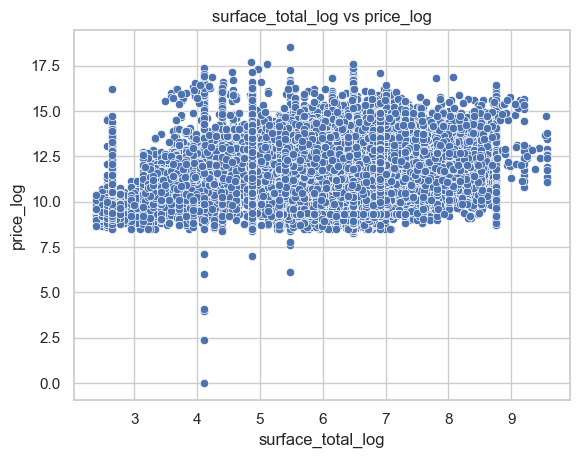

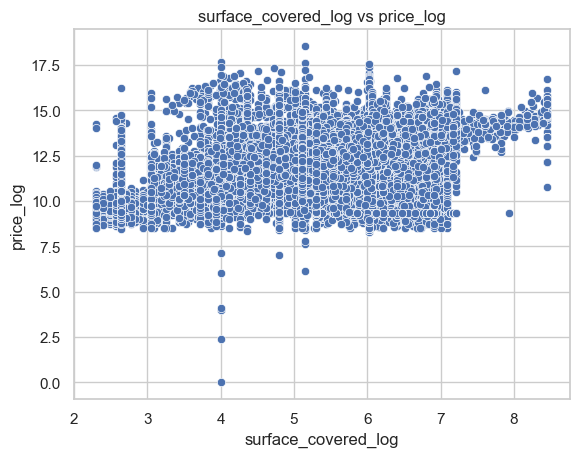

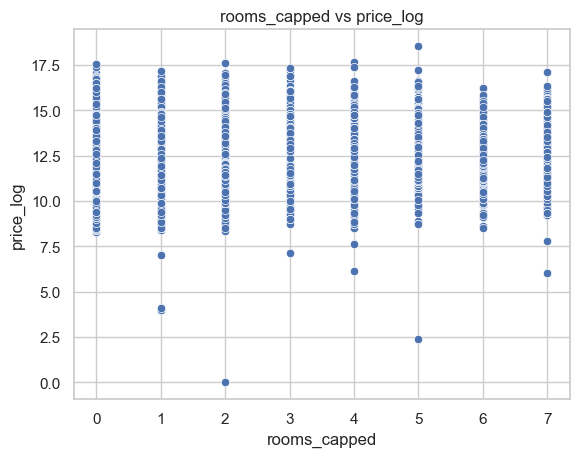

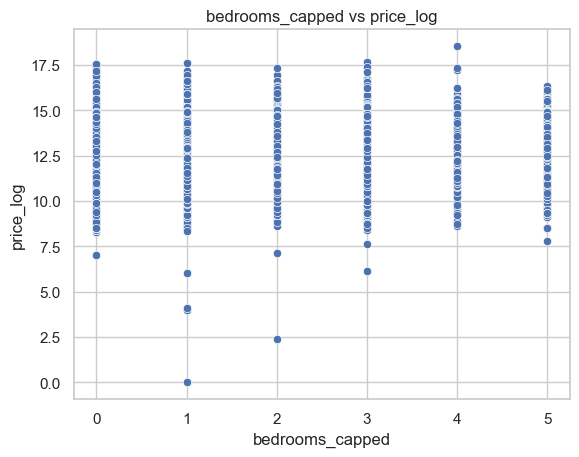

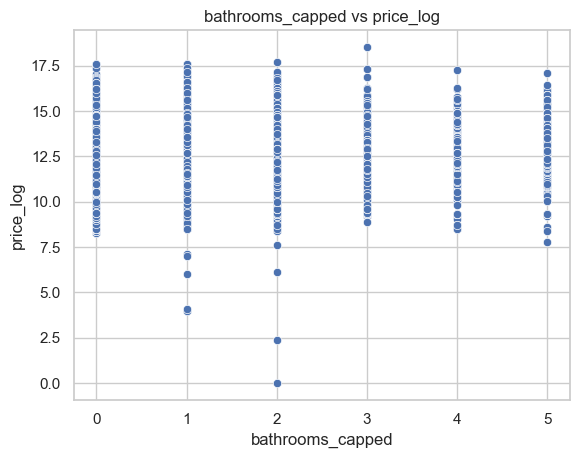

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numericas:
    sns.scatterplot(data=data_arg, x=col, y='price_log')
    plt.title(f'{col} vs price_log')
    plt.show()


In [48]:
data_arg[["price", "surface_total_capped", "surface_total_log"]].corr()


,price,surface_total_capped,surface_total_log
price,1.000000,0.116963,0.167132
surface_total_capped,0.116963,1.000000,0.701471
surface_total_log,0.167132,0.701471,1.000000


¿El precio aumenta con más habitaciones, baños, dormitorios?

¿Cómo es la relación entre price y variables de surficies?

¿Qué provincias o localidad tienen los precios más altos o bajos?

¿Cual es la relación precio y el tipo de propiedad?¿Los departamentos son más baratos que las casas?